In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#loading data
Salary_Datatest1  = pd.read_csv('C:/Users/OM/Downloads/Salary_Data test1.csv')
print(Salary_Datatest1.columns)
Salary_Datatrain1  = pd.read_csv('C:/Users/OM/Downloads/Salary_Data train1.csv')
print(Salary_Datatrain1.columns)

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')
Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


In [5]:
##Joining both datasets in one using Merge
data = pd.merge(Salary_Datatest1,Salary_Datatrain1)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            5910 non-null   int64 
 1   workclass      5910 non-null   object
 2   education      5910 non-null   object
 3   educationno    5910 non-null   int64 
 4   maritalstatus  5910 non-null   object
 5   occupation     5910 non-null   object
 6   relationship   5910 non-null   object
 7   race           5910 non-null   object
 8   sex            5910 non-null   object
 9   capitalgain    5910 non-null   int64 
 10  capitalloss    5910 non-null   int64 
 11  hoursperweek   5910 non-null   int64 
 12  native         5910 non-null   object
 13  Salary         5910 non-null   object
dtypes: int64(5), object(9)
memory usage: 692.6+ KB


In [6]:
missing_percentage =(data.isnull().mean())
print(missing_percentage)



age              0.0
workclass        0.0
education        0.0
educationno      0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
native           0.0
Salary           0.0
dtype: float64


In [7]:
data.duplicated().sum()



4116

In [8]:
data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
#descriptive statistics
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000
mean,32.815059,9.774450,49.204738,2.436548,38.545516
std,10.892922,1.675096,1433.023789,71.195428,7.456800
min,17.000000,1.000000,0.000000,0.000000,8.000000
25%,23.000000,9.000000,0.000000,0.000000,40.000000
50%,32.000000,9.000000,0.000000,0.000000,40.000000
75%,40.000000,10.000000,0.000000,0.000000,40.000000
max,67.000000,16.000000,99999.000000,2415.000000,85.000000


In [10]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

<Axes: >

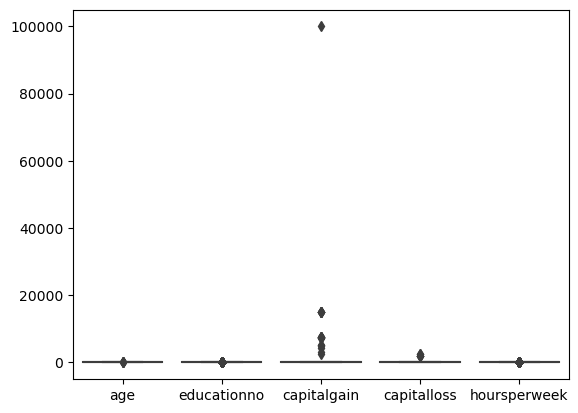

In [11]:
#outliers 
sns.boxplot(data)

C:\Users\OM\AppData\Local\Temp\ipykernel_4556\1887584206.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


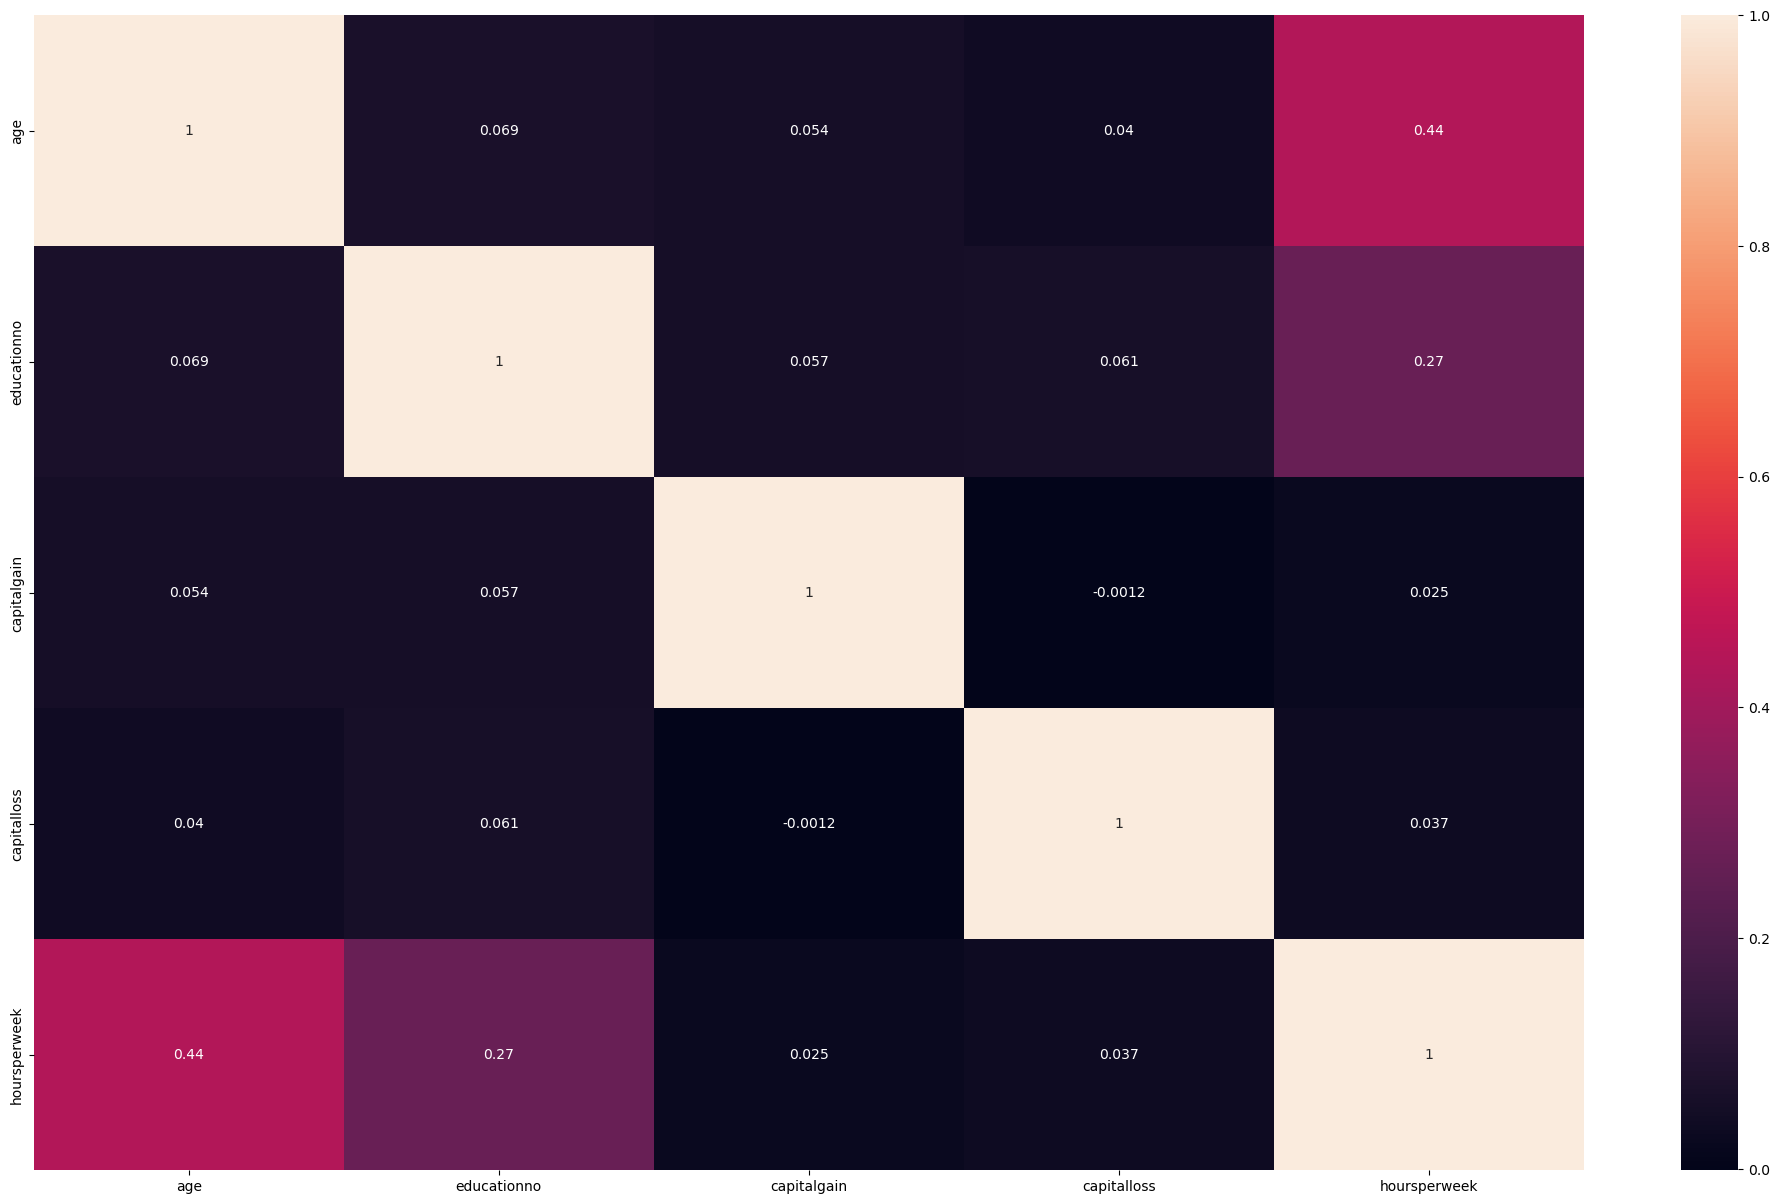

In [12]:
#heatmap
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [13]:
#EDA in ONE html file
import pandas_profiling as pp
profile = pp.ProfileReport(data)
profile.to_file('Salary.html')

C:\Users\OM\AppData\Local\Temp\ipykernel_4556\1645087174.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# defaultdict LabelEncoding 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
# Encoding the variable
data = data.apply(lambda lb: d[lb.name].fit_transform(lb))
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,26,2,12,13,1,2,0,2,1,0,0,24,3,1
1,26,2,12,13,1,2,0,2,1,0,0,24,3,1
2,20,2,11,8,4,5,4,2,0,0,0,7,3,0
3,8,2,9,12,1,7,0,2,1,0,0,17,3,0
4,8,2,9,12,1,7,0,2,1,0,0,17,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,11,2,11,8,2,4,1,2,1,0,0,17,3,0
5906,17,2,15,9,0,6,1,2,0,0,0,13,3,0
5907,14,2,11,8,2,5,1,2,1,0,0,17,3,0
5908,21,2,12,13,1,7,0,2,1,0,0,24,3,1


In [20]:
data.dtypes
data.head(2)
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [23]:
#Modeling
#SVM
X = data.drop('Salary', axis=1)
y = data['Salary']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#kernel='rbf'
# training the SVM Model
# Initialize the SVM model
svm_model = SVC(kernel='rbf')  # You can use 'rbf' kernel for non-linear classification

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Evaluating the Model
# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report (precision, recall, F1-score, etc.)
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       991
           1       0.81      0.49      0.61       191

    accuracy                           0.90      1182
   macro avg       0.86      0.73      0.77      1182
weighted avg       0.89      0.90      0.89      1182

Confusion Matrix:
[[969  22]
 [ 98  93]]


In [24]:
#kernel='linear'
# training the SVM Model
# Initialize the SVM model
svm_model = SVC(kernel='linear')  # You can use 'rbf' kernel for non-linear classification

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Evaluating the Model
# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report (precision, recall, F1-score, etc.)
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       991
           1       0.76      0.49      0.59       191

    accuracy                           0.89      1182
   macro avg       0.83      0.73      0.76      1182
weighted avg       0.88      0.89      0.88      1182

Confusion Matrix:
[[961  30]
 [ 98  93]]


In [ ]:
#Conlussion:
    #classification based on the Salary using SVM is done by using two deffirent Kernel('linera';Accuracy: 0.89,'rbf';Accuracy:0.90)

    